In [1]:
import networkx as nx
import matplotlib as plt
%matplotlib inline 
import math
import random
import numpy as np
from sklearn import preprocessing

In [4]:
#graph = nx.powerlaw_cluster_graph(10000, 2, 0.25, seed=10)

In [5]:
print(graph.edges())

[(0, 2), (0, 1935), (0, 8131), (0, 6), (0, 3735), (0, 6284), (0, 271), (0, 657), (0, 8083), (0, 4500), (0, 149), (0, 23), (0, 8126), (0, 4484), (0, 666), (0, 3631), (0, 4380), (0, 8093), (0, 1567), (0, 5664), (0, 4002), (0, 4132), (0, 5382), (0, 8870), (0, 1787), (0, 5928), (0, 298), (0, 8306), (0, 942), (0, 1327), (0, 8794), (0, 180), (0, 693), (0, 9528), (0, 2335), (0, 4247), (0, 6973), (0, 5438), (0, 2751), (0, 1600), (0, 5671), (0, 450), (0, 4675), (0, 3399), (0, 5320), (0, 3017), (0, 5450), (0, 6476), (0, 5794), (0, 207), (0, 336), (0, 7227), (0, 850), (0, 3411), (0, 6996), (0, 343), (0, 3033), (0, 2010), (0, 1371), (0, 7628), (0, 2910), (0, 610), (0, 1275), (0, 2533), (0, 8294), (0, 4967), (0, 9577), (0, 106), (0, 4007), (0, 2541), (0, 240), (0, 881), (0, 1010), (0, 5491), (0, 5621), (0, 1526), (0, 9720), (0, 1658), (0, 1019), (0, 3242), (0, 8203), (0, 1023), (1, 1537), (1, 2), (1, 3), (1, 4), (1, 5), (1, 7), (1, 9), (1, 10), (1, 11), (1, 525), (1, 15), (1, 16), (1, 17), (1, 18),

In [27]:
l=[1,2,3]
print(math.sqrt(sum(l)))

2.44948974278


In [2]:
def _random_subset(seq,m):
    """ Return m unique elements from seq.

    This differs from random.sample which can return repeated
    elements if seq holds repeated elements.
    """
    targets=set()
    while len(targets)<m:
        x=random.choice(seq)
        targets.add(x)
    return targets


In [3]:
def powerlaw_cluster_graph(n, m, p, seed=None):
    """Holme and Kim algorithm for growing graphs with powerlaw
    degree distribution and approximate average clustering.

    Parameters
    ----------
    n : int
        the number of nodes
    m : int
        the number of random edges to add for each new node
    p : float,
        Probability of adding a triangle after adding a random edge
    seed : int, optional
        Seed for random number generator (default=None).

    Notes
    -----
    The average clustering has a hard time getting above
    a certain cutoff that depends on m.  This cutoff is often quite low.
    Note that the transitivity (fraction of triangles to possible
    triangles) seems to go down with network size.

    It is essentially the Barabási-Albert (B-A) growth model with an
    extra step that each random edge is followed by a chance of
    making an edge to one of its neighbors too (and thus a triangle).

    This algorithm improves on B-A in the sense that it enables a
    higher average clustering to be attained if desired.

    It seems possible to have a disconnected graph with this algorithm
    since the initial m nodes may not be all linked to a new node
    on the first iteration like the B-A model.

    References
    ----------
    .. [1] P. Holme and B. J. Kim,
       "Growing scale-free networks with tunable clustering",
       Phys. Rev. E, 65, 026107, 2002.
    """

    if m < 1 or n < m:
        raise nx.NetworkXError(\
              "NetworkXError must have m>1 and m<n, m=%d,n=%d"%(m,n))

    if p > 1 or p < 0:
        raise nx.NetworkXError(\
              "NetworkXError p must be in [0,1], p=%f"%(p))
    if seed is not None:
        random.seed(seed)

    G=nx.empty_graph(m,create_using=nx.DiGraph()) # add m initial nodes (m0 in barabasi-speak)
    G.name="Powerlaw-Cluster Graph"
    repeated_nodes=G.nodes()  # list of existing nodes to sample from
                           # with nodes repeated once for each adjacent edge
    source=m               # next node is m
    while source<n:        # Now add the other n-1 nodes
        possible_targets = _random_subset(repeated_nodes,m)
        # do one preferential attachment for new node
        target=possible_targets.pop()
        G.add_edge(source,target)
        repeated_nodes.append(target) # add one node to list for each new link
        count=1
        while count<m:  # add m-1 more new links
            if random.random()<p: # clustering step: add triangle
                neighborhood=[nbr for nbr in G.neighbors(target) \
                               if not G.has_edge(source,nbr) \
                               and not nbr==source]
                if neighborhood: # if there is a neighbor without a link
                    nbr=random.choice(neighborhood)
                    G.add_edge(source,nbr) # add triangle
                    repeated_nodes.append(nbr)
                    count=count+1
                    continue # go to top of while loop
            # else do preferential attachment step if above fails
            target=possible_targets.pop()
            G.add_edge(source,target)
            repeated_nodes.append(target)
            count=count+1

        repeated_nodes.extend([source]*m)  # add source node to list m times
        source += 1
    return G

In [4]:
graph = powerlaw_cluster_graph(100000,2, 0.25, seed=10)

In [5]:
numIterations = 10
size = nx.number_of_nodes(graph)
hubScore = [0.0]*size
authority=[1.0]*size


In [6]:
def normalize(l):
    RSS=math.sqrt(sum([i*i for i in l]))
    return [i/RSS for i in l]

In [7]:
hits, authority = nx.hits(graph, max_iter=500)

    

In [75]:
print type(graph)
G=nx.empty_graph(10,create_using=nx.DiGraph())
print type(G)

<class 'networkx.classes.digraph.DiGraph'>
<class 'networkx.classes.digraph.DiGraph'>


In [8]:
inDegree = graph.in_degree()
outDegree = graph.out_degree()

In [44]:
#revGraph=graph.reverse(copy=True)
#adjListDict={}
#for node in graph.nodes():
#    adjListDict[node]=revGraph.neighbors(node)
    
adjListDict={}
for node in graph.nodes():
    adjListDict[node]=graph.neighbors(node)

In [10]:
featureVector = []
for i in range(0,size):
    featureVector.append([inDegree[i], outDegree[i], hits[i], authority[i]])

print type(featureVector)




<type 'list'>


In [48]:
#featureVectorNP = np.asarray(featureVector

In [49]:
#featureVectorScaled = preprocessing.scale(featureVectorNP)

In [50]:
print featureVector

[[970, 0, 0.0, 0.002264077002809039], [4444, 0, 0.0, 0.47647620577755384], [1561, 2, 0.0002146190585833195, 0.018647120884230796], [1095, 2, 0.00022196356996251562, 0.01102887612314112], [688, 2, 0.00022196356996251562, 0.004932235168198014], [281, 2, 0.00021581519271742972, 0.001296941043223871], [218, 2, 3.2261035867787837e-06, 0.0008171848876676627], [79, 2, 0.00021854831418084895, 0.00011762854865732616], [199, 2, 8.940914205796009e-06, 0.0004176930226014044], [1389, 2, 0.00021854831418084895, 0.018488807337030577], [1064, 2, 0.0002218925980688121, 0.011314060224783793], [37, 2, 0.00022196356996251562, 0.0004580082775087929], [181, 2, 7.283207091866841e-06, 0.0002700976927712033], [463, 2, 2.5774624868073905e-06, 0.001786332832283847], [277, 2, 1.3360612443249185e-05, 0.0010648110634865898], [457, 2, 0.00022196356996251562, 0.0012539555631814621], [756, 2, 0.00021440488608142282, 0.010279047375383588], [132, 2, 0.00021854831418084895, 0.0014666434250152436], [68, 2, 0.0002218925980

In [47]:
#similarityHash = {}
#similarityHash = np.zeros([size, size])-1
def similarity(vec1, vec2):
    sim = np.dot(vec1,vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec1))
    return int(sim + 0.5)

def similarityWrapper(node1, node2, vec1, vec2):
    if similarityHash[node1][node2] == -1:
        similarityHash[node1][node2] = similarity(vec1,vec2)
        similarityHash[node2][node1] = similarityHash[node1][node2]
    else:
        return similarityHash[node1][node2]
        
    

In [43]:
featureVectorScaled[10]
print np.dot(featureVectorScaled[1],featureVectorScaled[2])
print np.linalg.norm(featureVectorScaled[1])
print np.linalg.norm(featureVectorScaled[2])
print similarity(featureVectorScaled[1],featureVectorScaled[2])
print graph.neighbors

23942.0681001
454.529011295
84.9229326833
0
<bound method DiGraph.successors of <networkx.classes.digraph.DiGraph object at 0x7fa2ca0960d0>>


In [14]:
print featureVector[9]
x=[1,2,5,0.5]
y=[1,1,1,1]

[1389, 2, 0.00021854831418084895, 0.018488807337030577]


In [23]:
def calcSync(followers, featureVector):
    if len(followers)==0:
        return 0.0
    numeratorSum = 0.0
    for i in range(0,len(followers)):
        for j in range(i+1, len(followers)):
            numeratorSum += similarity(featureVector[i],featureVector[j])
    return numeratorSum/(len(followers)*len(followers))

In [24]:
def calcNormalcy(followers, featureVector, size):
    numeratorSum = 0.0
    if len(followers)==0:
        return 0.0
    for i in range(0,len(followers)):
        for j in range(0, size):
            if i!=j:
                numeratorSum += similarity(featureVector[i],featureVector[j])
    return numeratorSum/(len(followers)*size)

In [26]:
calcNormalcy(11, adjListDict[11], featureVectorScaled, size)

-0.34379550788216473

In [27]:
calcSync(11, adjListDict[11], featureVectorScaled)

0.40057714864607596

In [28]:
sync=[]
normalcy=[]
for i in range(0, size):
    sync.append(calcSync(adjListDict[i], featureVectorNP))


In [30]:
def normalizeList(list):
    minList=min(list)
    maxList=max(list)
    listNorm=[float(i)/maxList for i in list]
    return listNorm

In [31]:
#print sync

syncNorm=normalizeList(sync)
print syncNorm

[0.98940253256079047, 0.92194785225504672, 0.97373497228436812, 0.97992470758286787, 0.98312542626512522, 0.93571151210132564, 0.95520185417043291, 0.91645946590698046, 0.94714456955078996, 0.97507916125024408, 0.98935969022180326, 0.83423935068402277, 0.93419229455936414, 0.97518209039917569, 0.94382254192856585, 0.98109886758697529, 0.98607571778272074, 0.91694804182598411, 0.8753120541185998, 0.97525560112663157, 0.93299502328045514, 0.91040097092416339, 0.94395233620911634, 0.94194483487899661, 0.94265325487655882, 0.92346363834342349, 0.92254500812450357, 0.91731364627000156, 0.93303227102960395, 0.94449925112187927, 1.0, 0.9424997694696613, 0.95158985269392593, 0.96646999203314032, 0.97425995347577365, 0.92397006441675678, 0.94368650917371377, 0.95330407619686797, 0.93856550113388926, 0.93449454147103028, 0.91851162211899595, 0.93299502328045514, 0.96920821778762389, 0.91694804182598411, 0.8456636623058007, 0.92118246245386159, 0.83915941880477962, 0.93751972485031088, 0.93848326

In [32]:
for i in range(0, size):
    normalcy.append(calcNormalcy(i, adjListDict[i], featureVectorNP, size))

KeyboardInterrupt: 

In [57]:
#print normalcy
normalcyNorm=normalizeList(normalcy)

print normalcyNorm

[0.08463471260230572, 0.03091597798881798, 0.058282457915301053, 0.068009769171301734, 0.085881144139070234, 0.16010731338916911, 0.16254155975739032, 0.2269681665708404, 0.21346196394843497, 0.059071420863029037, 0.0722463899099762, 0.46405476859069217, 0.19180202263064594, 0.12216250190572443, 0.14437260302127619, 0.11073450178960195, 0.089162117457310508, 0.21020057889800328, 0.32491611284399391, 0.11685969419879944, 0.26999799641032124, 0.34110987442367313, 0.34110987442367313, 0.30425643403555441, 0.15154091029561598, 0.21988822133782043, 0.25518186053059339, 0.34110987442367313, 0.32491611284399391, 0.21020057889800328, 0.091341274186369628, 0.2055330529426545, 0.16010731338916911, 0.13255589368582291, 0.12673045742732689, 0.18401071745978595, 0.1453188120786284, 0.17065776066708593, 0.21346196394843497, 0.24804138683997037, 0.21675313922188433, 0.32491611284399391, 0.14981714716311489, 0.22199236164085662, 0.37919730729740869, 0.19857964767082614, 0.34958641751227282, 0.30425643

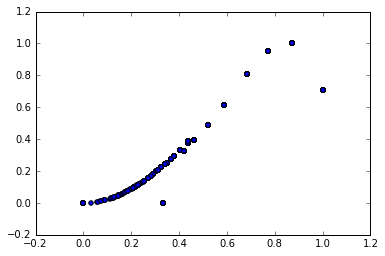

In [59]:
fig,ax = plt.pyplot.subplots(1)
#fig, ax = plt.pyplot.subplots()
plt.pyplot.scatter(normalcyNorm,syncNorm)
#plt.pyplot.xticks(np.arange(min(x), max(x)+1, 0.05))
start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 0.1))
plt.pyplot.show()


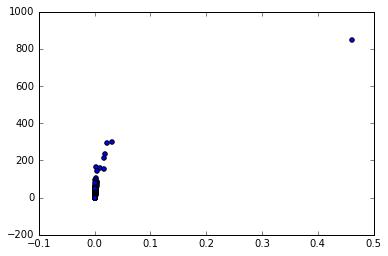

In [71]:
fig,ax = plt.pyplot.subplots(1)
#fig, ax = plt.pyplot.subplots()
plt.pyplot.scatter(x,y)
#plt.pyplot.xticks(np.arange(min(x), max(x)+1, 0.05))
start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 0.1))
plt.pyplot.show()

In [70]:
x=[]
y=[]
for i in range(0, size):
    x.append(authority[i])
    y.append(inDegree[i])
